In [1]:
import pandas as pd
import numpy as np

bureau_data = pd.read_csv('data/bureau.csv')

count     774354
unique         4
top       Closed
freq      489622
Name: CREDIT_ACTIVE, dtype: object
count              774354
unique                 14
top       Consumer credit
freq               563545
Name: CREDIT_TYPE, dtype: object
count    774354.000000
mean          0.533727
std          28.387156
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2792.000000
Name: CREDIT_DAY_OVERDUE, dtype: float64
count    7.743540e+05
mean     2.083465e+01
std      2.646012e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.125734e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64
count    774354.000000
mean          0.005430
std           0.089438
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: CNT_CREDIT_PROLONG, dtype: float64


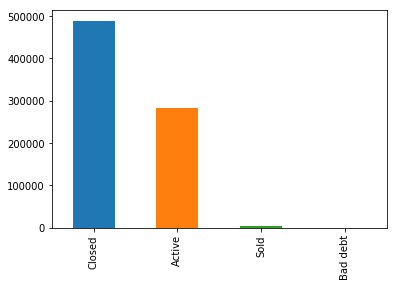

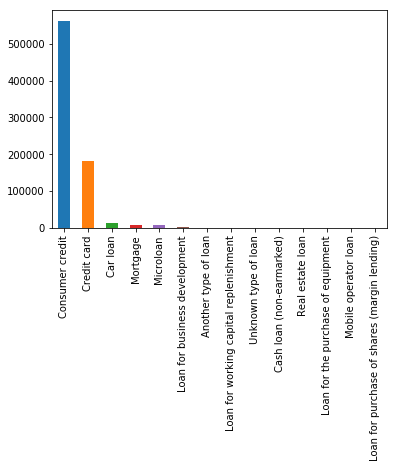

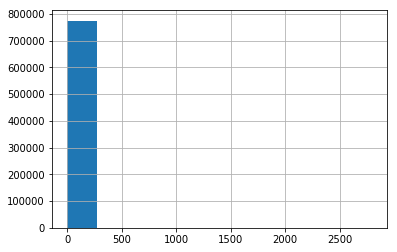

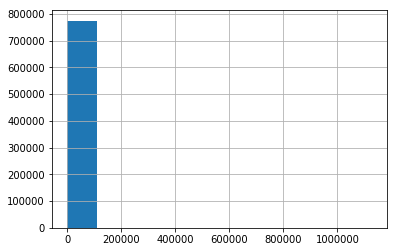

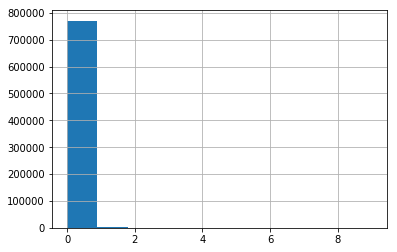

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

agg_categorical_cols = ['CREDIT_ACTIVE', 'CREDIT_TYPE']
agg_num_cols = ['CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM_OVERDUE', 'CNT_CREDIT_PROLONG']

for col in agg_categorical_cols:
    plt.figure()
    print(bureau_data[col].describe())
    bureau_data[col].value_counts().plot(kind='bar')
    
for col in agg_num_cols:
    plt.figure()
    print(bureau_data[col].describe())
    bureau_data[col].hist()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64


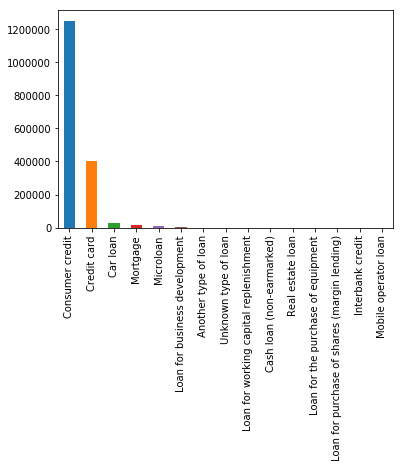

In [3]:
print(bureau_data['CREDIT_TYPE'].value_counts())
bureau_data['CREDIT_TYPE'].value_counts().plot(kind='bar')

In [4]:
bureau_balance_summary = pd.read_csv('data/bureau_balance_summary.csv')
bureau_balance_summary = bureau_balance_summary.fillna(0)
bureau_data = bureau_data.merge(bureau_balance_summary, how='inner', on='SK_ID_BUREAU')

In [6]:
# summarized_bureau_balance_data = pd.read_csv('data/bureau_balance_summary.csv')

# merged = bureau_data.merge(summarized_bureau_balance_data, how='left', on='SK_ID_BUREAU')

bureau_data['TYPE_VALUE_PAIRS'] = list(zip(bureau_data['CREDIT_TYPE'], bureau_data['CREDIT_ACTIVE']))

In [7]:
grouped = bureau_data.groupby(by='SK_ID_CURR')

status_summary = grouped.apply(lambda x: x['TYPE_VALUE_PAIRS'].value_counts())

agg_functions = {
    'SK_ID_BUREAU': 'count',
    'CREDIT_DAY_OVERDUE': 'sum',
    'AMT_CREDIT_SUM_OVERDUE': 'sum',
    'CNT_CREDIT_PROLONG': 'sum',
    '0': 'median',
    '1': 'median',
    '2': 'median',
    '3': 'median',
    '4': 'median',
    '5': 'median',
    'C': 'median',
    'X': 'median',
    'most_recent_status': lambda x: x.value_counts().index[0]
}
    
agg_summary = grouped.agg(agg_functions)

In [8]:
unstacked_status_summary = status_summary.unstack()
num_summary_records = len(unstacked_status_summary)

for col in unstacked_status_summary.columns:
    num_missing = unstacked_status_summary[col].isna().sum()
    print(col, num_missing/num_summary_records)
    
unstacked_status_summary = unstacked_status_summary.fillna(0)

('Another type of loan', 'Active') 0.999479716371096
('Another type of loan', 'Closed') 0.9976661562932021
('Another type of loan', 'Sold') 0.9999479716371096
('Car loan', 'Active') 0.9671924008859687
('Car loan', 'Closed') 0.9510784736364852
('Car loan', 'Sold') 0.9983573902573174
('Cash loan (non-earmarked)', 'Active') 0.9997026950691977
('Cash loan (non-earmarked)', 'Closed') 0.9999554042603797
('Cash loan (non-earmarked)', 'Sold') 0.9999405390138395
('Consumer credit', 'Active') 0.37773334720756346
('Consumer credit', 'Bad debt') 0.9999777021301899
('Consumer credit', 'Closed') 0.1536025924989966
('Consumer credit', 'Sold') 0.9898470366131022
('Credit card', 'Active') 0.4345185889907984
('Credit card', 'Closed') 0.7356736186469652
('Credit card', 'Sold') 0.9937342985833421
('Loan for business development', 'Active') 0.9988405107698711
('Loan for business development', 'Closed') 0.9957634047360675
('Loan for business development', 'Sold') 0.9999925673767299
('Loan for purchase of sh

In [9]:
joined_summary = agg_summary.join(unstacked_status_summary)

In [15]:
joined_summary.to_csv('data/summary/bureau_summary.csv')